Import necessary libraries

In [38]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load cleaned data

In [39]:
data = pd.read_csv('/content/cleaned_data_outlier.csv')
data.head()

,Month,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0.693147,3.178054,Scientist,9.858235,1.386294,1.609438,1.386294,1.609438,1.386294,2.079442,...,Good,6.698243,3.325849,5.583496,No,3.923456,3.111975,High_spent_Small_value_payments,5.747781,Good
1,1.098612,3.178054,Scientist,9.858235,1.386294,1.609438,1.386294,1.609438,1.386294,1.609438,...,Good,6.698243,3.494838,5.587249,No,3.923456,3.111975,Low_spent_Large_value_payments,5.654694,Good
2,1.386294,3.178054,Scientist,9.858235,1.386294,1.609438,1.386294,1.609438,1.386294,2.079442,...,Good,6.698243,3.388090,5.590987,No,3.923456,3.111975,Low_spent_Medium_value_payments,5.805767,Good
3,1.609438,3.178054,Scientist,9.858235,1.386294,1.609438,1.386294,1.609438,1.791759,1.609438,...,Good,6.698243,3.477475,5.594711,No,3.923456,3.111975,Low_spent_Small_value_payments,5.413659,Good
4,1.791759,3.178054,Scientist,9.858235,1.386294,1.609438,1.386294,1.609438,1.945910,1.609438,...,Good,6.698243,3.250272,5.598422,No,3.923456,3.111975,High_spent_Medium_value_payments,5.836240,Good


In [40]:
data_copy=data.copy()

Encoding

In [41]:
#Label Encoding is used to encode target variable
from sklearn.preprocessing import LabelEncoder

label_en = LabelEncoder()

In [42]:
data['Credit_Score'] = label_en.fit_transform(data['Credit_Score'])

In [43]:
# Separate features and target
X = data.drop('Credit_Score', axis=1)
y = data['Credit_Score']

In [44]:
#value counts of y
y.value_counts()

,count
Credit_Score,
2,53174
1,28998
0,17828


In [45]:
pip install category_encoders

In [46]:
import category_encoders as ce
# Create the binary encoder
encoder = ce.BinaryEncoder(cols=['Occupation','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour' ])

# Perform the encoding
X_encoded = encoder.fit_transform(X)

X_encoded

,Month,Age,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount_0,Payment_of_Min_Amount_1,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour_0,Payment_Behaviour_1,Payment_Behaviour_2,Monthly_Balance
0,0.693147,3.178054,0,0,0,1,9.858235,1.386294,1.609438,1.386294,...,3.325849,5.583496,0,1,3.923456,3.111975,0,0,1,5.747781
1,1.098612,3.178054,0,0,0,1,9.858235,1.386294,1.609438,1.386294,...,3.494838,5.587249,0,1,3.923456,3.111975,0,1,0,5.654694
2,1.386294,3.178054,0,0,0,1,9.858235,1.386294,1.609438,1.386294,...,3.388090,5.590987,0,1,3.923456,3.111975,0,1,1,5.805767
3,1.609438,3.178054,0,0,0,1,9.858235,1.386294,1.609438,1.386294,...,3.477475,5.594711,0,1,3.923456,3.111975,1,0,0,5.413659
4,1.791759,3.178054,0,0,0,1,9.858235,1.386294,1.609438,1.386294,...,3.250272,5.598422,0,1,3.923456,3.111975,1,0,1,5.836240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.609438,3.258097,1,1,0,1,10.587341,1.609438,1.945910,2.079442,...,3.574130,5.937536,0,1,3.586404,3.220014,1,1,0,6.175589
99996,1.791759,3.258097,1,1,0,1,10.587341,1.609438,1.945910,2.079442,...,3.727274,5.940171,0,1,3.586404,3.220014,1,0,1,6.209900
99997,1.945910,3.258097,1,1,0,1,10.587341,1.609438,1.945910,2.079442,...,3.743735,5.942799,0,1,3.586404,3.220014,1,1,0,6.249607
99998,2.079442,3.258097,1,1,0,1,10.587341,1.609438,1.945910,2.079442,...,3.544957,5.945421,0,1,3.586404,3.220014,0,1,0,5.768836


In [47]:
from imblearn.over_sampling import SMOTE

 # Synthetic Minority Oversampling Technique

smote = SMOTE()
X_encoded, y = smote.fit_resample(X_encoded,y)

In [48]:
#value count of y
y.value_counts()

,count
Credit_Score,
0,53174
2,53174
1,53174


In [49]:
#new data merging X_encoded and y
data_encoded = pd.concat([X_encoded, y], axis=1)
data_encoded.head()

,Month,Age,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit_History_Age,Payment_of_Min_Amount_0,Payment_of_Min_Amount_1,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour_0,Payment_Behaviour_1,Payment_Behaviour_2,Monthly_Balance,Credit_Score
0,0.693147,3.178054,0,0,0,1,9.858235,1.386294,1.609438,1.386294,...,5.583496,0,1,3.923456,3.111975,0,0,1,5.747781,0
1,1.098612,3.178054,0,0,0,1,9.858235,1.386294,1.609438,1.386294,...,5.587249,0,1,3.923456,3.111975,0,1,0,5.654694,0
2,1.386294,3.178054,0,0,0,1,9.858235,1.386294,1.609438,1.386294,...,5.590987,0,1,3.923456,3.111975,0,1,1,5.805767,0
3,1.609438,3.178054,0,0,0,1,9.858235,1.386294,1.609438,1.386294,...,5.594711,0,1,3.923456,3.111975,1,0,0,5.413659,0
4,1.791759,3.178054,0,0,0,1,9.858235,1.386294,1.609438,1.386294,...,5.598422,0,1,3.923456,3.111975,1,0,1,5.836240,0


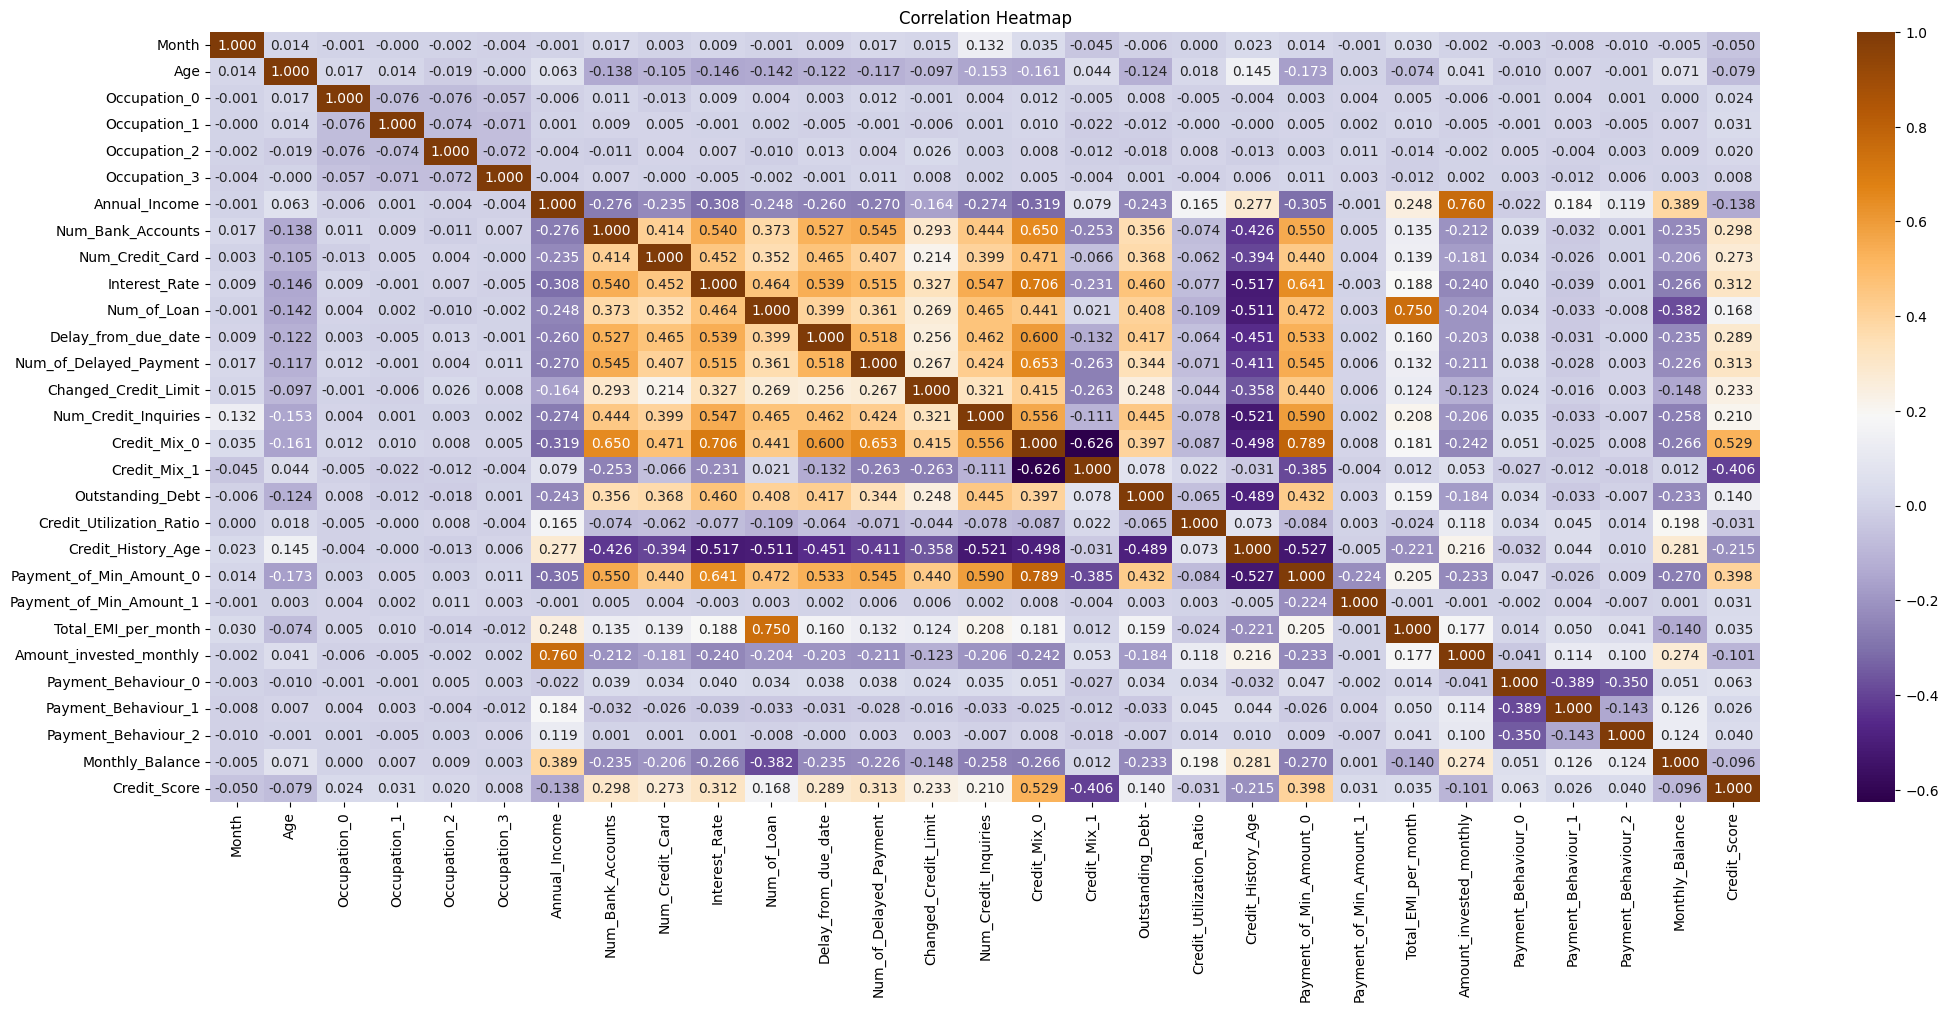

In [50]:
#find correlation
corr = data_encoded.corr()
plt.figure(figsize=(25, 10))
sns.heatmap(corr, annot=True, cmap='PuOr_r', fmt=".3f")
plt.title('Correlation Heatmap')
plt.show()

In [51]:
#correlation of all features with target variable
corr_with_target = corr['Credit_Score'].sort_values(ascending=False)
corr_with_target

,Credit_Score
Credit_Score,1.000000
Credit_Mix_0,0.528745
Payment_of_Min_Amount_0,0.398204
Num_of_Delayed_Payment,0.312515
Interest_Rate,0.311508
Num_Bank_Accounts,0.297749
Delay_from_due_date,0.288501
Num_Credit_Card,0.273291
Changed_Credit_Limit,0.232524
Num_Credit_Inquiries,0.210003


In [52]:
X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159522 entries, 0 to 159521
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     159522 non-null  float64
 1   Age                       159522 non-null  float64
 2   Occupation_0              159522 non-null  int64  
 3   Occupation_1              159522 non-null  int64  
 4   Occupation_2              159522 non-null  int64  
 5   Occupation_3              159522 non-null  int64  
 6   Annual_Income             159522 non-null  float64
 7   Num_Bank_Accounts         159522 non-null  float64
 8   Num_Credit_Card           159522 non-null  float64
 9   Interest_Rate             159522 non-null  float64
 10  Num_of_Loan               159522 non-null  float64
 11  Delay_from_due_date       159522 non-null  float64
 12  Num_of_Delayed_Payment    159522 non-null  float64
 13  Changed_Credit_Limit      159522 non-null  f

In [53]:
#splitting data into train,validaton and test data
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
#split to validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)


In [54]:
X_train.shape, X_val.shape, X_test.shape

((95712, 28), (31905, 28), (31905, 28))

In [55]:
y_train.shape, y_val.shape, y_test.shape

((95712,), (31905,), (31905,))

In [56]:
#scaling
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [57]:
pip install catboost

In [58]:
# Random forest algorithm is selected by testing all the algorithms

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_val_pred = rf_clf.predict(X_val)
print('Random Forest Accuracy is', accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

Random Forest Accuracy is 0.8735621375959881
              precision    recall  f1-score   support

           0       0.86      0.95      0.91     10590
           1       0.88      0.91      0.89     10693
           2       0.88      0.76      0.82     10622

    accuracy                           0.87     31905
   macro avg       0.87      0.87      0.87     31905
weighted avg       0.87      0.87      0.87     31905



In [60]:
# Predict on the test set
y_test_pred = rf_clf.predict(X_test)
# Calculate the test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
# Print the test accuracy and classification report
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Classification Report:")
print(classification_report(y_test, y_test_pred))

Test Accuracy: 0.87
Test Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     10710
           1       0.87      0.91      0.89     10578
           2       0.89      0.76      0.82     10617

    accuracy                           0.87     31905
   macro avg       0.88      0.87      0.87     31905
weighted avg       0.88      0.87      0.87     31905



Hyperparameter tuning

In [61]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
parameter = {'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
             'criterion': ['gini', 'entropy'],
             'n_estimators': [50, 100, 200, 400, 600]}

# Create a RandomForestClassifier object
rf_clf = RandomForestClassifier()

In [62]:
# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=rf_clf,
                                   param_distributions=parameter,
                                   n_iter=10,  # Number of different parameter combinations to try
                                   scoring='accuracy',
                                   cv=5,  # 5-fold cross-validation
                                   verbose=1,
                                   random_state=42)

# Fit the model
random_result = random_search.fit(X_train, y_train)

# Get the best parameters and score
print('Best_params: ', random_result.best_params_)
print('Best_score: ', random_result.best_score_)

# Train the model with the best parameters
rf_clf2 = RandomForestClassifier(**random_result.best_params_)
rf_clf2.fit(X_train, y_train)

# Predict and evaluate
y_val_pred2 = rf_clf2.predict(X_val)
print('Random Forest Accuracy is', accuracy_score(y_val, y_val_pred2))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best_params:  {'n_estimators': 400, 'max_depth': 70, 'criterion': 'entropy'}
Best_score:  0.8633295504554903
Random Forest Accuracy is 0.8774173327064724


In [63]:
# Predict on the test set
y_test_pred2 = rf_clf2.predict(X_test)
# Calculate the test accuracy
test_accuracy2 = accuracy_score(y_test, y_test_pred2)
# Print the test accuracy and classification report
print(f"Test Accuracy: {test_accuracy2:.2f}")
print(f"Test Classification Report:")
print(classification_report(y_test, y_test_pred2))

Test Accuracy: 0.88
Test Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     10710
           1       0.88      0.92      0.90     10578
           2       0.89      0.76      0.82     10617

    accuracy                           0.88     31905
   macro avg       0.88      0.88      0.88     31905
weighted avg       0.88      0.88      0.88     31905



In [64]:
#cross-validation score
from sklearn.model_selection import cross_val_score


cv_scores = cross_val_score(rf_clf2, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f}")

Cross-Validation Accuracy: 0.86


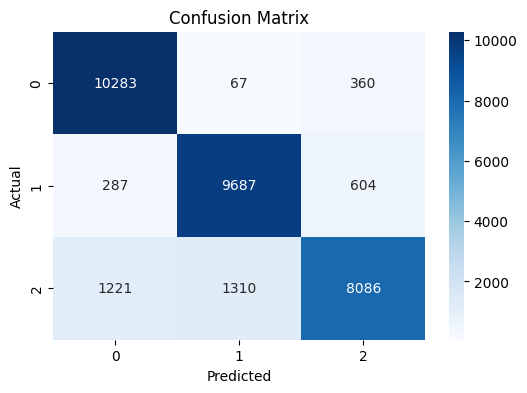

In [65]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred2)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [66]:
#feature importance
importances = rf_clf2.feature_importances_

# Sort the feature importances in descending order
indices = importances.argsort()[::-1]

# Print the feature ranking based on the feature index
print("Feature ranking (by index):")
for i in range(len(importances)):
    print(f"Feature {indices[i]}: {importances[indices[i]]:.4f}")

Feature ranking (by index):
Feature 17: 0.0996
Feature 9: 0.0800
Feature 15: 0.0702
Feature 11: 0.0635
Feature 0: 0.0614
Feature 19: 0.0591
Feature 14: 0.0521
Feature 13: 0.0456
Feature 8: 0.0443
Feature 22: 0.0402
Feature 6: 0.0395
Feature 23: 0.0377
Feature 7: 0.0373
Feature 12: 0.0371
Feature 27: 0.0358
Feature 1: 0.0337
Feature 18: 0.0331
Feature 10: 0.0310
Feature 16: 0.0278
Feature 20: 0.0217
Feature 3: 0.0068
Feature 2: 0.0066
Feature 4: 0.0066
Feature 5: 0.0066
Feature 26: 0.0063
Feature 25: 0.0060
Feature 24: 0.0056
Feature 21: 0.0047


In [67]:
#performance validation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred2)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision
precision = precision_score(y_test, y_test_pred2, average='weighted')
print(f"Precision: {precision:.4f}")

# Calculate recall
recall = recall_score(y_test, y_test_pred2, average='weighted')
print(f"Recall: {recall:.4f}")

# Calculate F1-Score
f1 = f1_score(y_test, y_test_pred2, average='weighted')
print(f"F1-Score: {f1:.4f}")

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred2)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.8794
Precision: 0.8804
Recall: 0.8794
F1-Score: 0.8773
Confusion Matrix:
[[10283    67   360]
 [  287  9687   604]
 [ 1221  1310  8086]]
